<a href="https://colab.research.google.com/github/krishbhowmick/End-to-End-Project/blob/master/Task1_LinearRegression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1_LinearRegression_PredictInsuranceCosts**

### **Objective**- Predict the accurate insurance costs?

### **Acknowledgements**- The dataset is available on Kaggle.

### **DataSet_Content**
###   Columns

***  age:** age of primary beneficiary

***  sex:** insurance contractor gender, female, male

***  bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

***  children:** Number of children covered by health insurance / Number of dependents

***  smoker:** Smoking

***  region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

***  charges:** Individual medical costs billed by health insurance

# **Steps of Predictive Modeling Follow**

**1.  Data Collection**

**2.  Data Exploration**
*   Reading the Data
*   Variable identification
* Univariate Analysis
* Bi-variate Analysis

**3.  Predictive Modeling**

# **Tools Used**

* Google Colab
* Numpy
* Pandas
* Matplotlib
* Seaborn
* sklearn


In [54]:
# Connect the google drive with google Colab

from google.colab import drivep value in correlation
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
# Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb 

In [56]:
# Import Data

path = '/content/drive/My Drive/DataScience_DataSet/IITB_Data/insurance.csv'  # ADD path/to/dataset
data = pd.read_csv(path)                                                      # Read the data
data.shape                                                                    # Show shape of the data

(1338, 7)

In [57]:
data.head()                                                                  # Print the first 5 rows of Dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
data.describe(include='all')                                               # Generate descriptive statistics of Data

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [59]:
temp = pd.DataFrame(index=data.columns)                             # Create DataFrame
temp['data_type'] = data.dtypes                                     # Show data type
temp['null_count'] = data.isnull().sum()                            #checking missing values in the data
temp['unique_count'] = data.nunique()                               #checking unique values in the data 
temp

,data_type,null_count,unique_count
age,int64,0,47
sex,object,0,2
bmi,float64,0,548
children,int64,0,6
smoker,object,0,2
region,object,0,4
charges,float64,0,1337


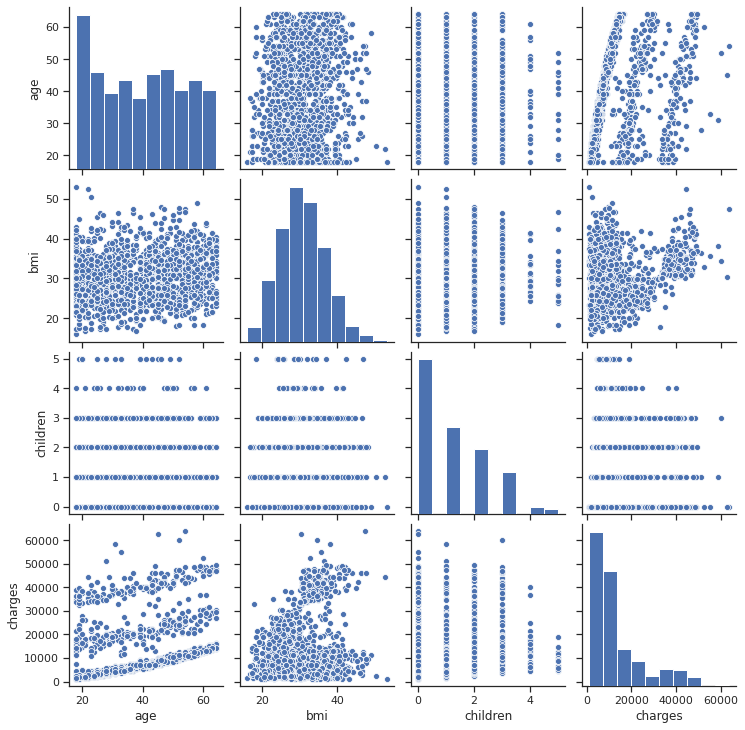

In [60]:
import seaborn as sb

sb.pairplot(data)

# **Univariate Data Analysis**

Text(0.5, 0, 'age')

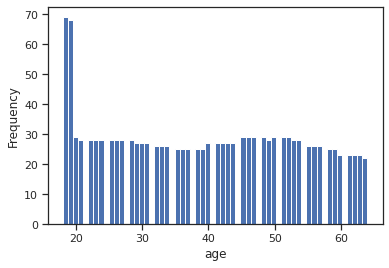

In [61]:
data['age'].plot.hist(bins = 60)
plt.xlabel('age', fontsize=12)                                  # Histogram plot of a single variable (age)

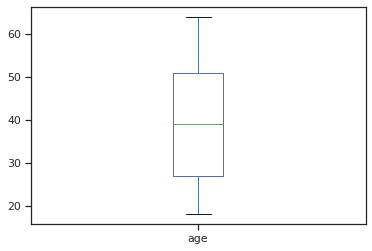

In [62]:
data["age"].plot.box()

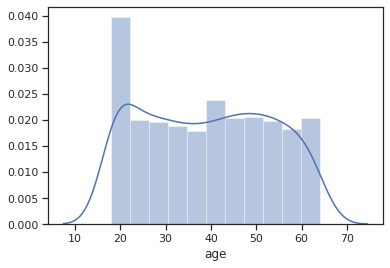

In [63]:
#The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function.
# By default, this will draw a histogram and fit a kernel density estimate (KDE).

sb.distplot(data["age"]);

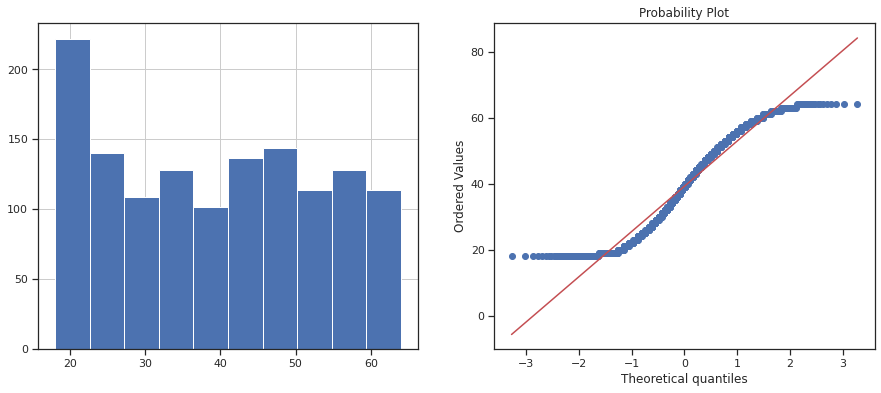

In [64]:
#def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
import scipy.stats as stats  
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data["age"].hist()

plt.subplot(1, 2, 2)
stats.probplot(data["age"], dist="norm", plot=plt)

plt.show()

##  From the above three graph,

We understand that The distribution of the "age" variable is no skewed.

Median is near 39.and ROI is between 27-51.



In [65]:
data['sex'].value_counts()/len(data)*100                        # Percentage of Indivisual_Value_Count (Region)

male      50.523169
female    49.476831
Name: sex, dtype: float64

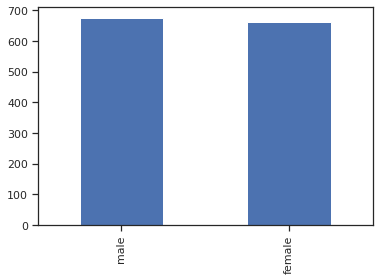

In [66]:
data['sex'].value_counts().plot(kind = 'bar')                  # Indivisual_Value_Count in bar plot (Region)

## From the above graph,

we understand that  the "sex" variable is distributed almost 50% indivisual intance.


Text(0.5, 0, 'bmi')

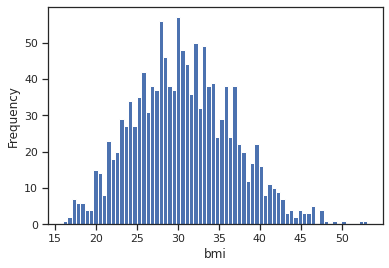

In [67]:
data['bmi'].plot.hist(bins = 70)
plt.xlabel('bmi', fontsize=12)

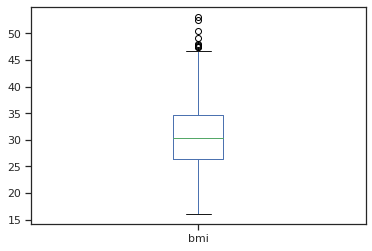

In [68]:
data["bmi"].plot.box()

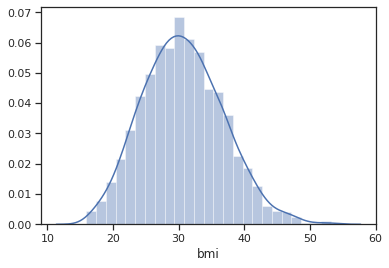

In [69]:
sb.distplot(data["bmi"])

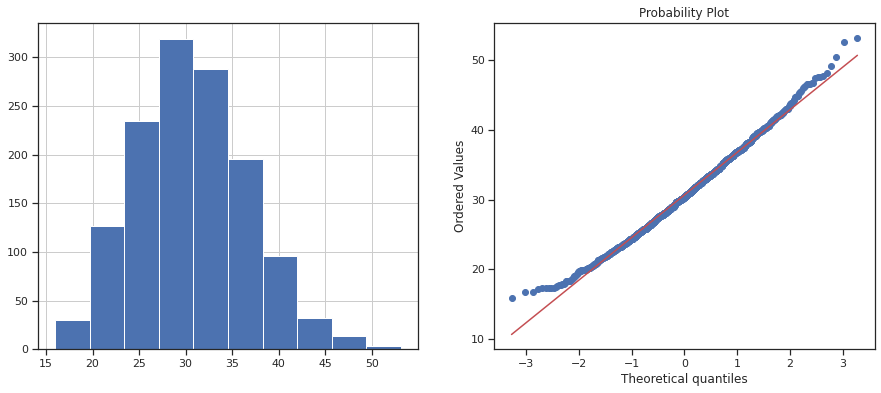

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data["bmi"].hist()

plt.subplot(1, 2, 2)
stats.probplot(data["bmi"], dist="norm", plot=plt)

plt.show()

## From the above three graph, 

we understand that The distribution of the "bmi" variable is no skewed abd it's follow gaussion distribution.

Median is near about 30, ROI is between 26-34 and we can see few outlier above 50.

In [71]:
data['children'].value_counts()/len(data)*100                     # Percentage of Indivisual_Value_Count (Region)

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

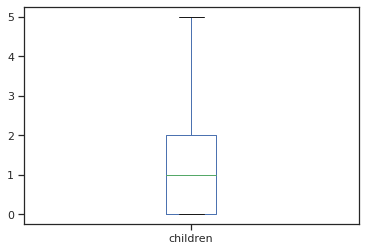

In [72]:
data["children"].plot.box()

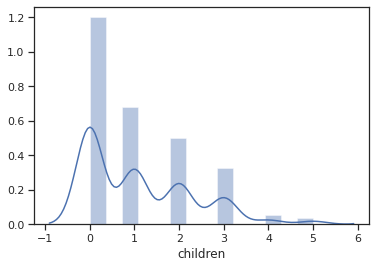

In [73]:
sb.distplot(data["children"])

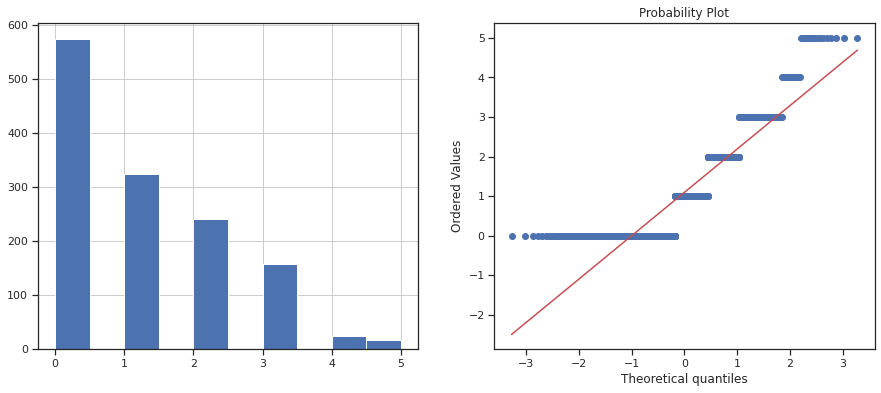

In [74]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data["children"].hist()

plt.subplot(1, 2, 2)
stats.probplot(data["children"], dist="norm", plot=plt)

plt.show()

## From the above graph,

we understand that most of the people have no children then gradually decrease with 1,2,3,4,5 children.

In [75]:
data['smoker'].value_counts()/len(data)*100                       # Percentage of Indivisual_Value_Count (Region)

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

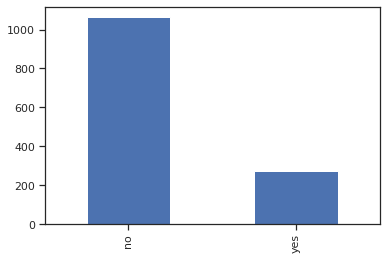

In [76]:
data['smoker'].value_counts().plot(kind = 'bar')                  # Indivisual_Value_Count in bar plot (Region)

## From the above graph,

we understand that most of the people do'nt smoke, only 20% people smoke.

In [77]:
data['region'].value_counts()/len(data)*100                                          # Indivisual_Value_Count (Region)

southeast    27.204783
northwest    24.289985
southwest    24.289985
northeast    24.215247
Name: region, dtype: float64

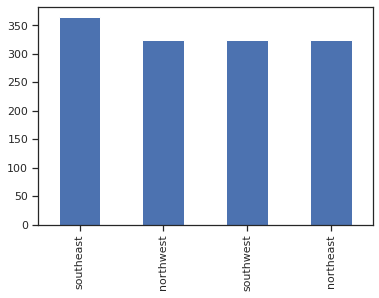

In [78]:
data['region'].value_counts().plot(kind = 'bar')                  # Indivisual_Value_Count in bar plot (Region)

##  From the above graph,
we understand that all the region have almost equally distributed only in southeast part have 2% extra from other region.

Text(0.5, 0, 'charges')

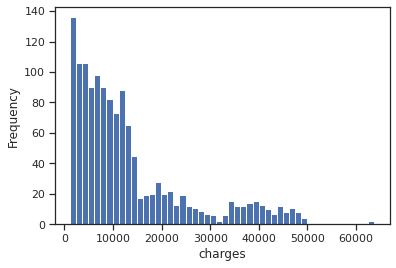

In [79]:
data['charges'].plot.hist(bins = 50)
plt.xlabel('charges', fontsize=12)

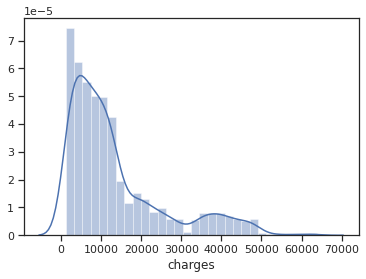

In [80]:
sb.distplot(data["charges"])

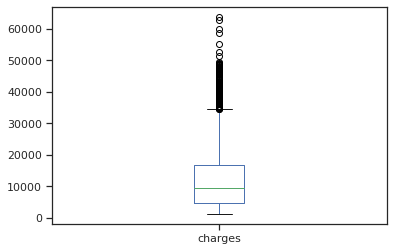

In [81]:
data["charges"].plot.box()

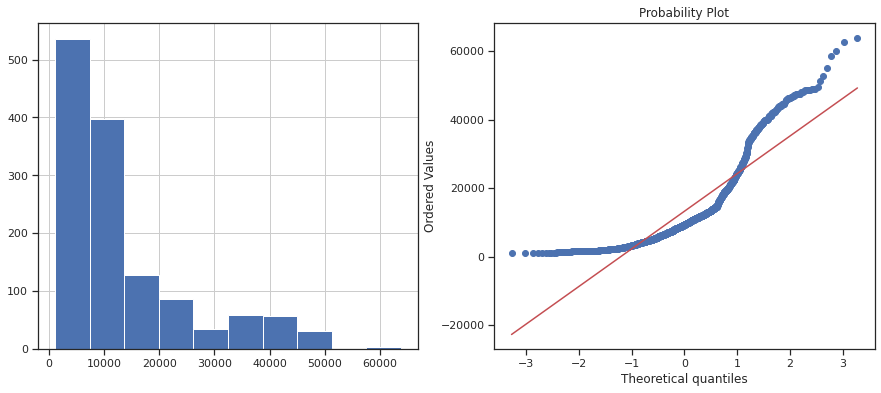

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data["charges"].hist()

plt.subplot(1, 2, 2)
stats.probplot(data["charges"], dist="norm", plot=plt)

plt.show()

##From the above three graph,

we understand that The distribution of the "charge" variable is slightly right skewed.

The charge start at rs 1120. Median is near 9300, ROI is between 4700-16600 and we can see few outlier after 35000

# **Bi-variate Data Analysis**

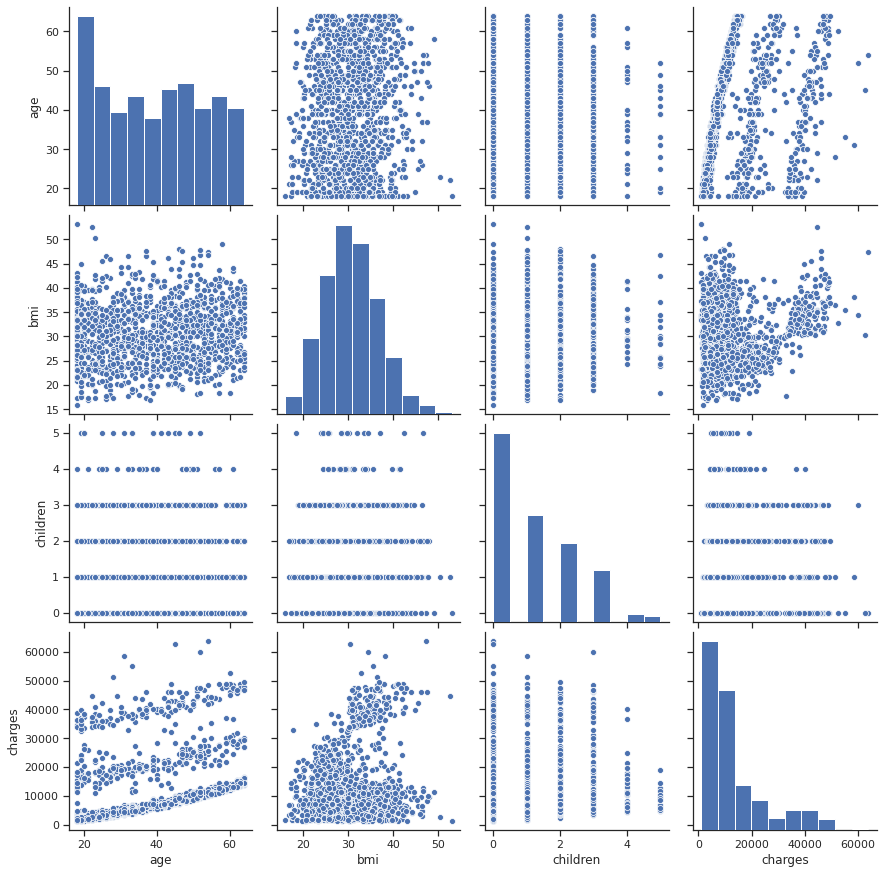

In [83]:

sb.set(style="ticks", color_codes=True)
g = sb.pairplot(data,height=3.0)

In [84]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


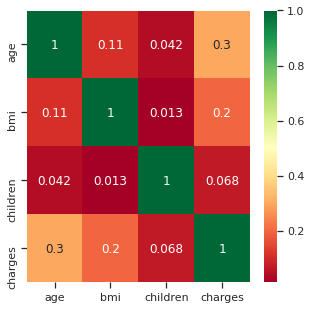

In [85]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn") 

So, First we check the correlation on among available data with different chart.

We can see very weak positive relationship between each variable. And the highest positive correlation is 0.3 between age and charges.

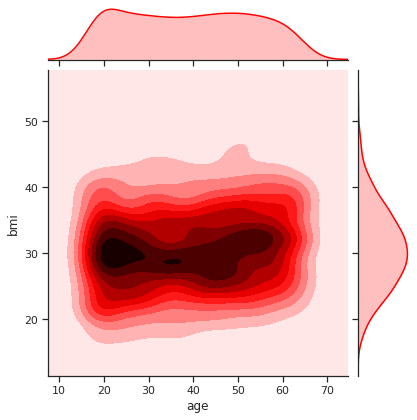

In [86]:
g=sb.jointplot(x="age",y="bmi",kind='kde',color='red',data=data)

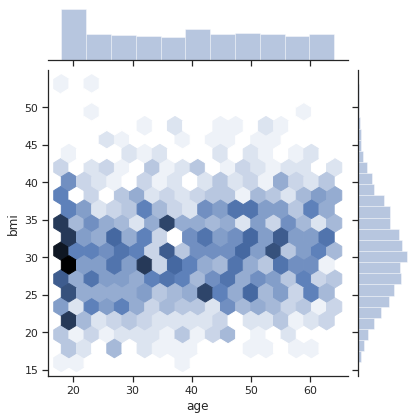

In [87]:
g=sb.jointplot(x="age",y="bmi",kind='hex',data=data)

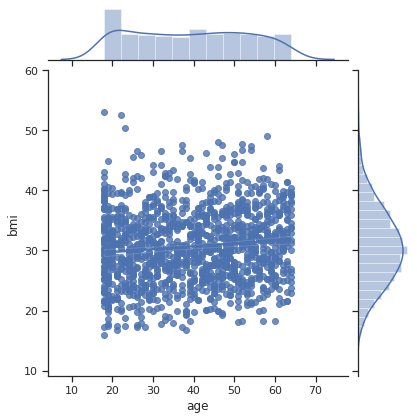

In [88]:
g=sb.jointplot(x="age",y="bmi",kind='reg',data=data)

In [89]:
import scipy.stats

a=scipy.stats.pearsonr(data['age'], data['bmi'])    # Pearson's r
b=scipy.stats.spearmanr(data['age'], data['bmi'])   # Spearman's rho
c=scipy.stats.kendalltau(data['age'], data['bmi'])  # Kendall's tau
a,b,c  #'age','sex','bmi','children','smoker','region','charges'

((0.10927188154853519, 6.194289065051802e-05),
 SpearmanrResult(correlation=0.10773603532023862, pvalue=7.859093373677643e-05),
 KendalltauResult(correlation=0.07327326343408677, pvalue=7.277631522947318e-05))

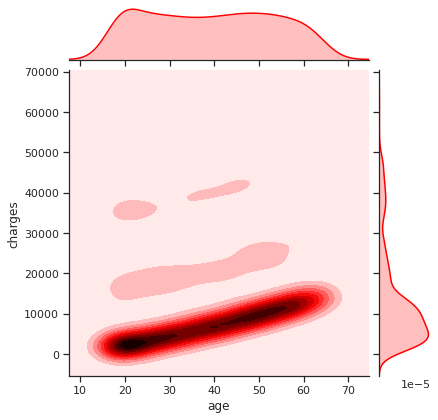

In [90]:
g=sb.jointplot(x="age",y="charges",kind='kde',color='red',data=data)

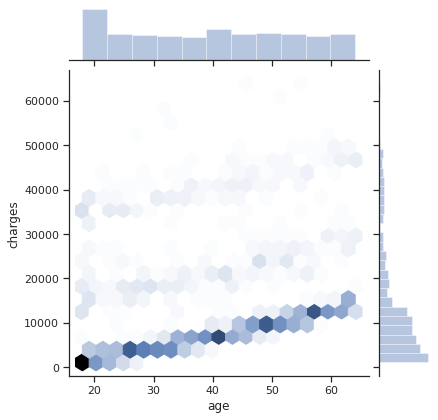

In [91]:
g=sb.jointplot(x="age",y="charges",kind='hex',data=data)

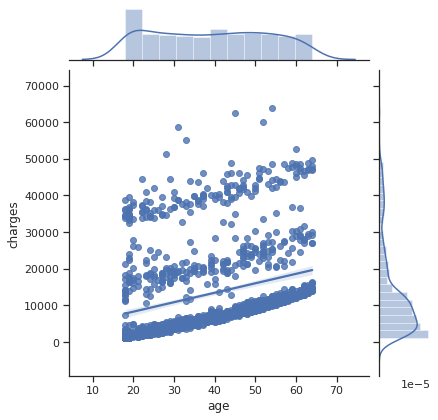

In [92]:
g=sb.jointplot(x="age",y="charges",kind='reg',data=data)

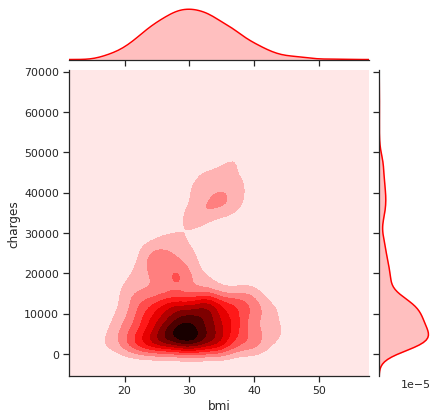

In [93]:
g=sb.jointplot(x="bmi",y="charges",kind='kde',color='red',data=data)

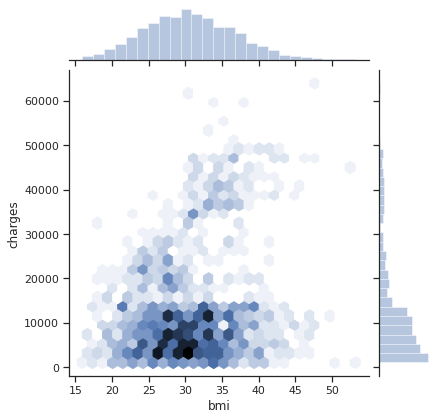

In [94]:
g=sb.jointplot(x="bmi",y="charges",kind='hex',data=data)

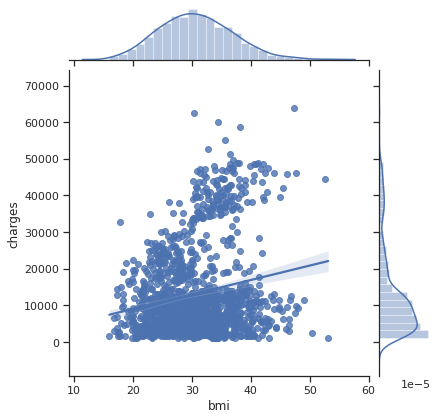

In [95]:
g=sb.jointplot(x="bmi",y="charges",kind='reg',data=data)

# **Multivariate data analysis**

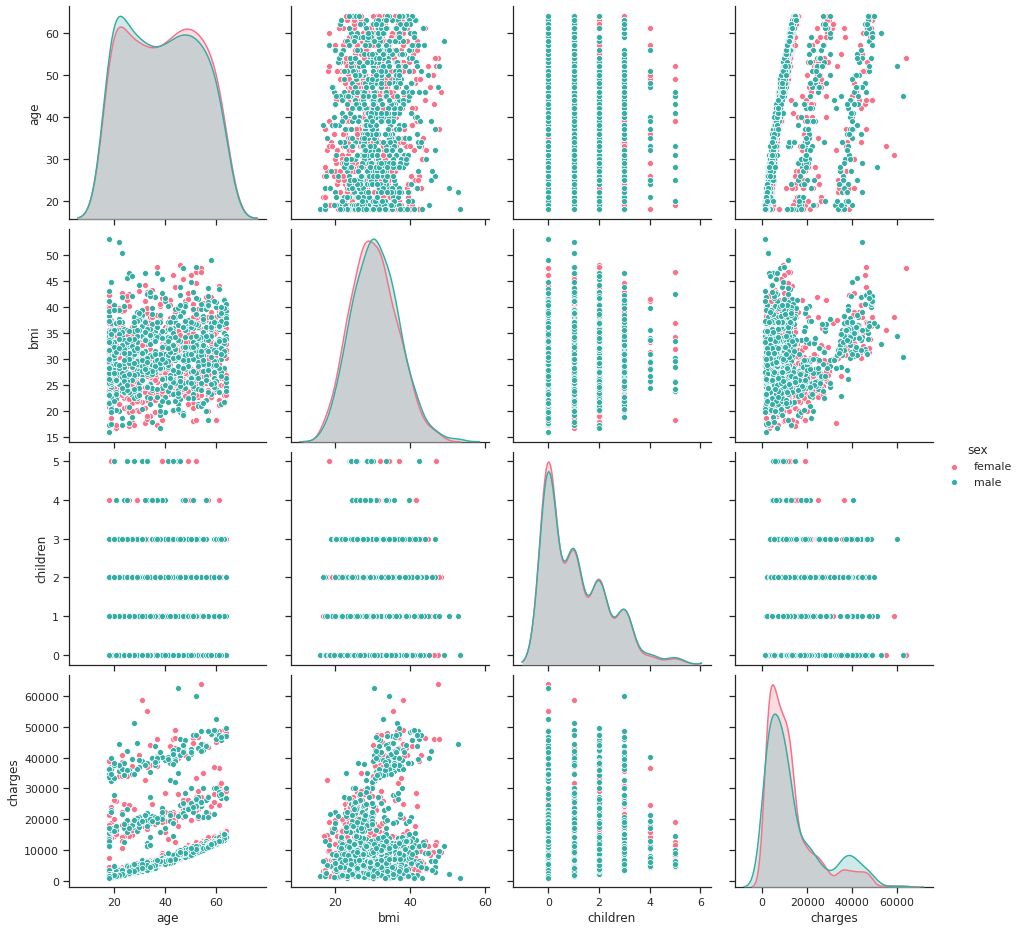

In [96]:
g = sb.pairplot(data, hue="sex",palette="husl", height=3.2)

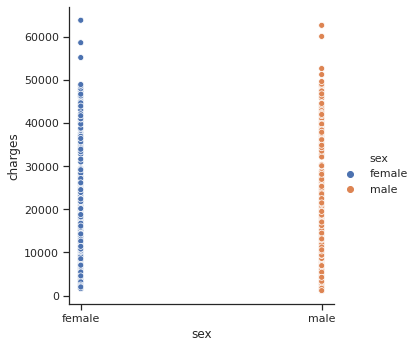

In [97]:
g= sb.relplot(x="sex", y="charges", hue="sex", data=data)
#'age','sex','bmi','children','smoker','region','charges'

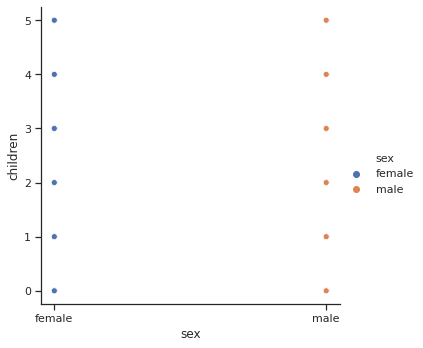

In [98]:
g= sb.relplot(x="sex", y="children", hue="sex", data=data)
#'age','sex','bmi','children','smoker','region','charges'

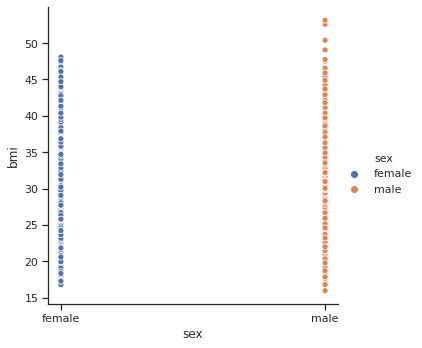

In [99]:
g= sb.relplot(x="sex", y="bmi", hue="sex", data=data)
#'age','sex','bmi','children','smoker','region','charges'

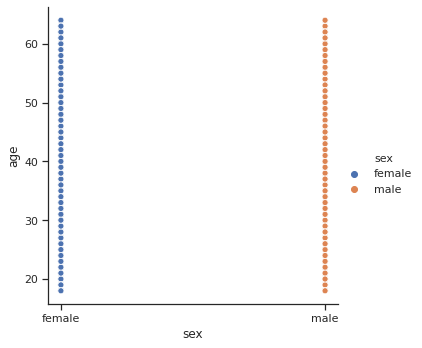

In [100]:
g= sb.relplot(x="sex", y="age", hue="sex", data=data)
#'age','sex','bmi','children','smoker','region','charges'

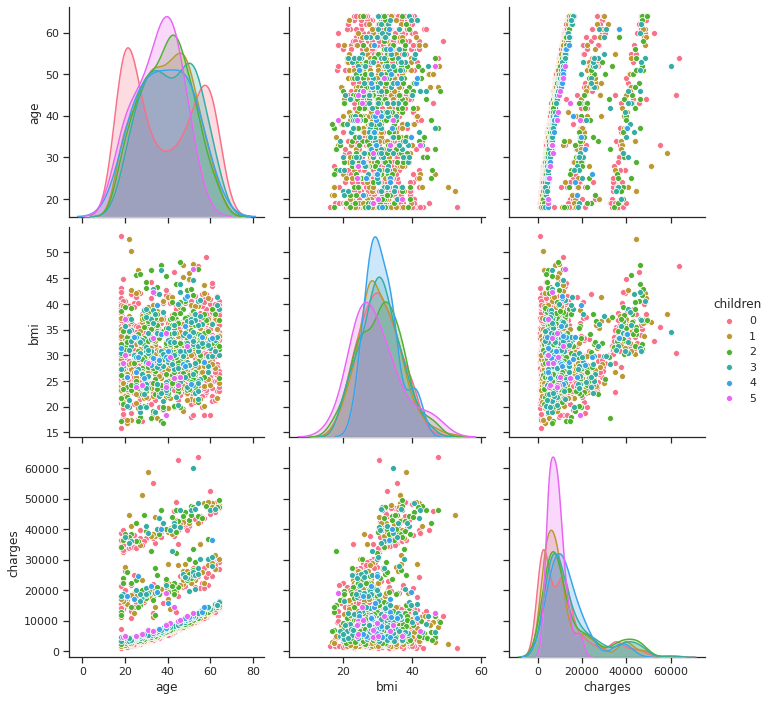

In [101]:
g = sb.pairplot(data, hue="children",palette="husl", height=3.2)
#'age','sex','bmi','children','smoker','region','charges'

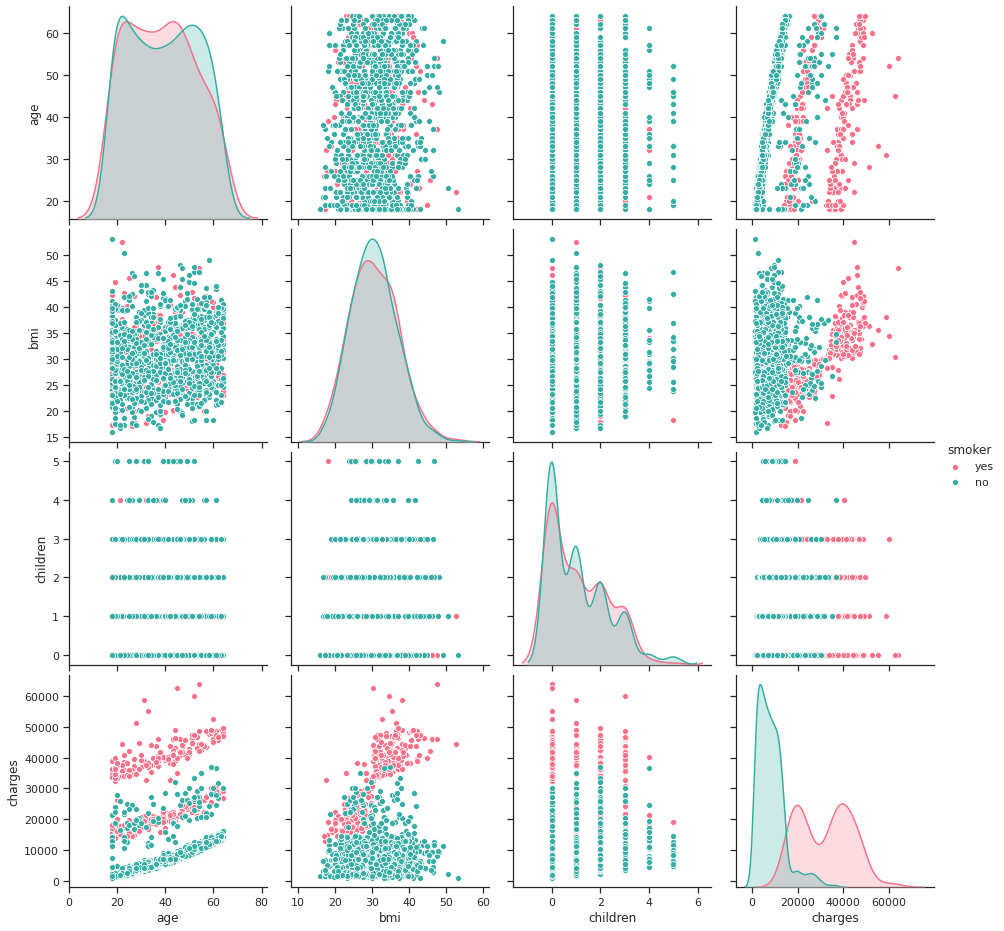

In [102]:
g = sb.pairplot(data, hue="smoker",palette="husl", height=3.2)
#'age','sex','bmi','children','smoker','region','charges'

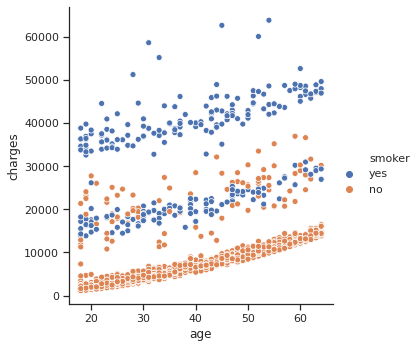

In [103]:
g= sb.relplot(x="age", y="charges", hue="smoker", data=data)
#'age','sex','bmi','children','smoker','region','charges'

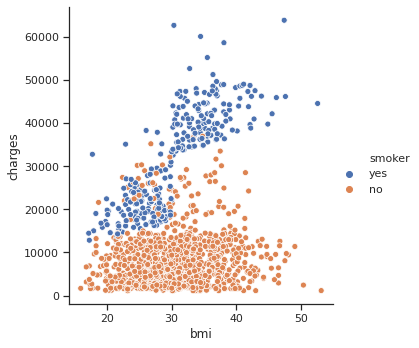

In [104]:
g= sb.relplot(x="bmi", y="charges", hue="smoker", data=data)
#'age','sex','bmi','children','smoker','region','charges'

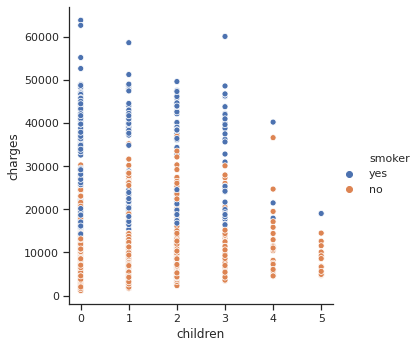

In [105]:
g= sb.relplot(x="children", y="charges", hue="smoker", data=data)
#'age','sex','bmi','children','smoker','region','charges'

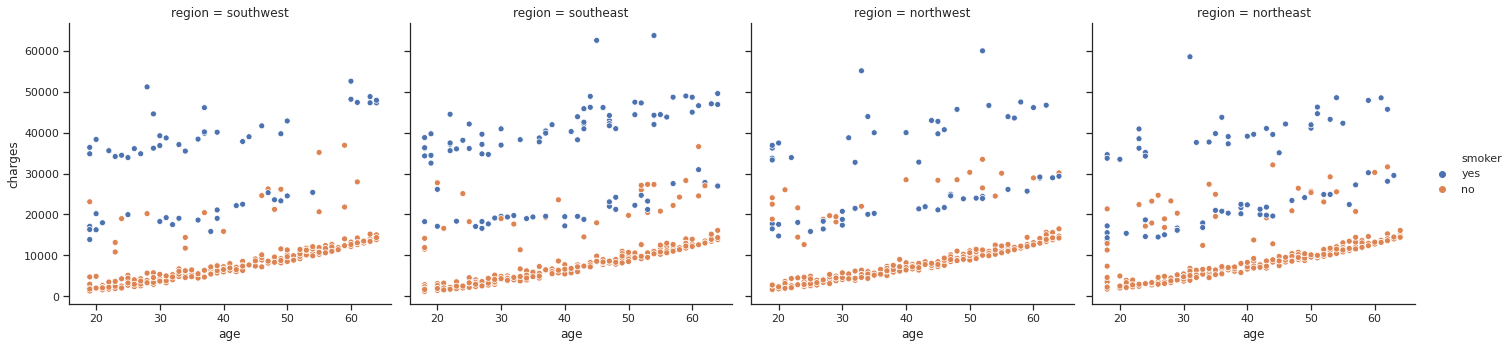

In [106]:
g= sb.relplot(x="age", y="charges", hue="smoker", col="region", data=data)
#'age','sex','bmi','children','smoker','region','charges'

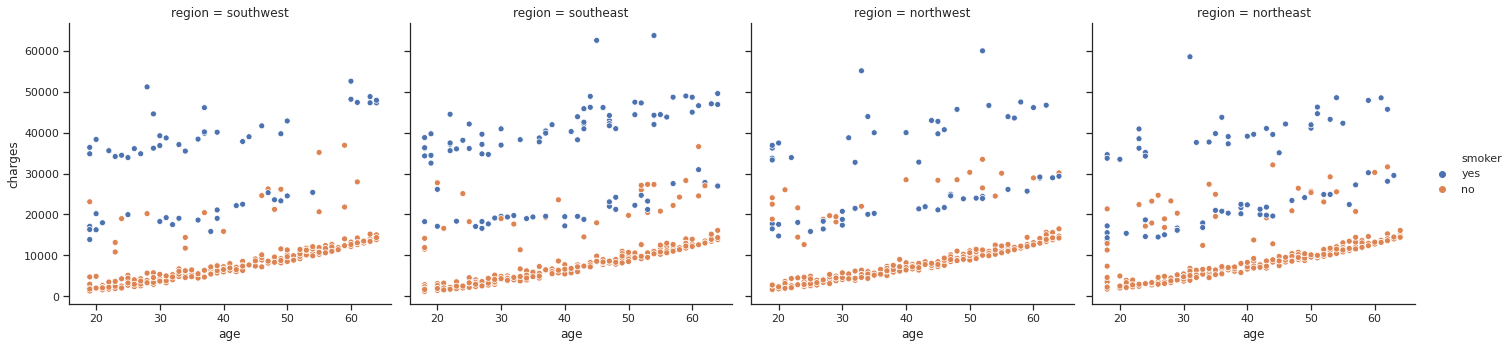

In [107]:
g= sb.relplot(x="age", y="charges", hue="smoker", col="region",  data=data)   #row="children",

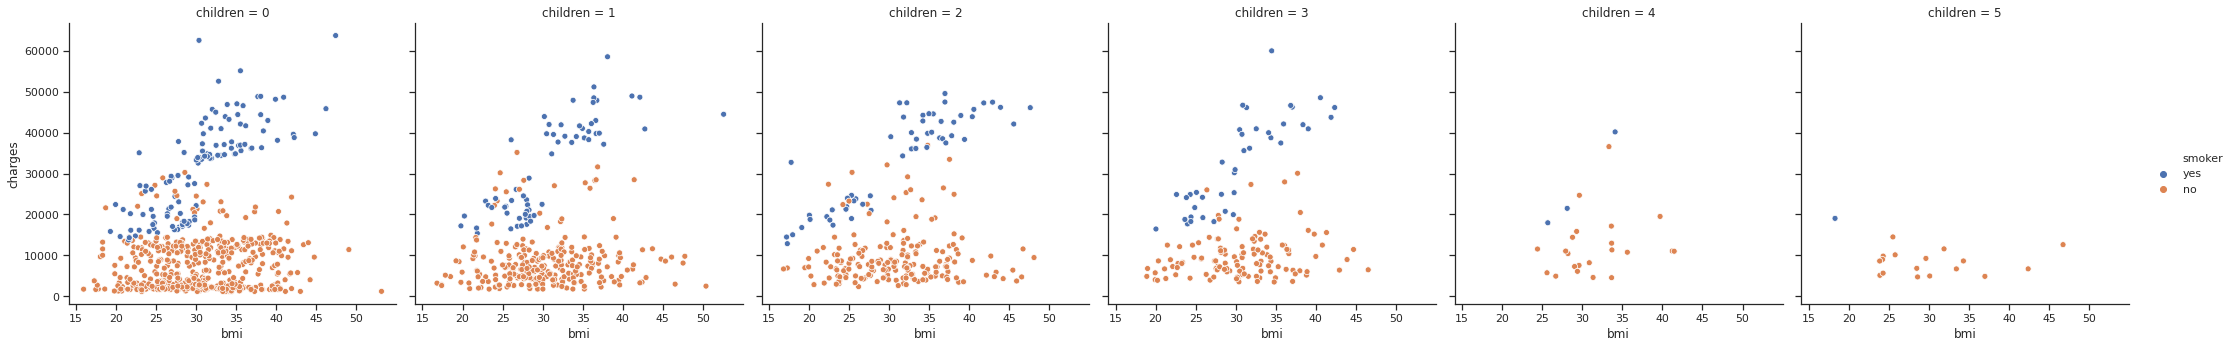

In [108]:
g= sb.relplot(x="bmi", y="charges", hue="smoker", col="children", data=data)
#'age','sex','bmi','children','smoker','region','charges'

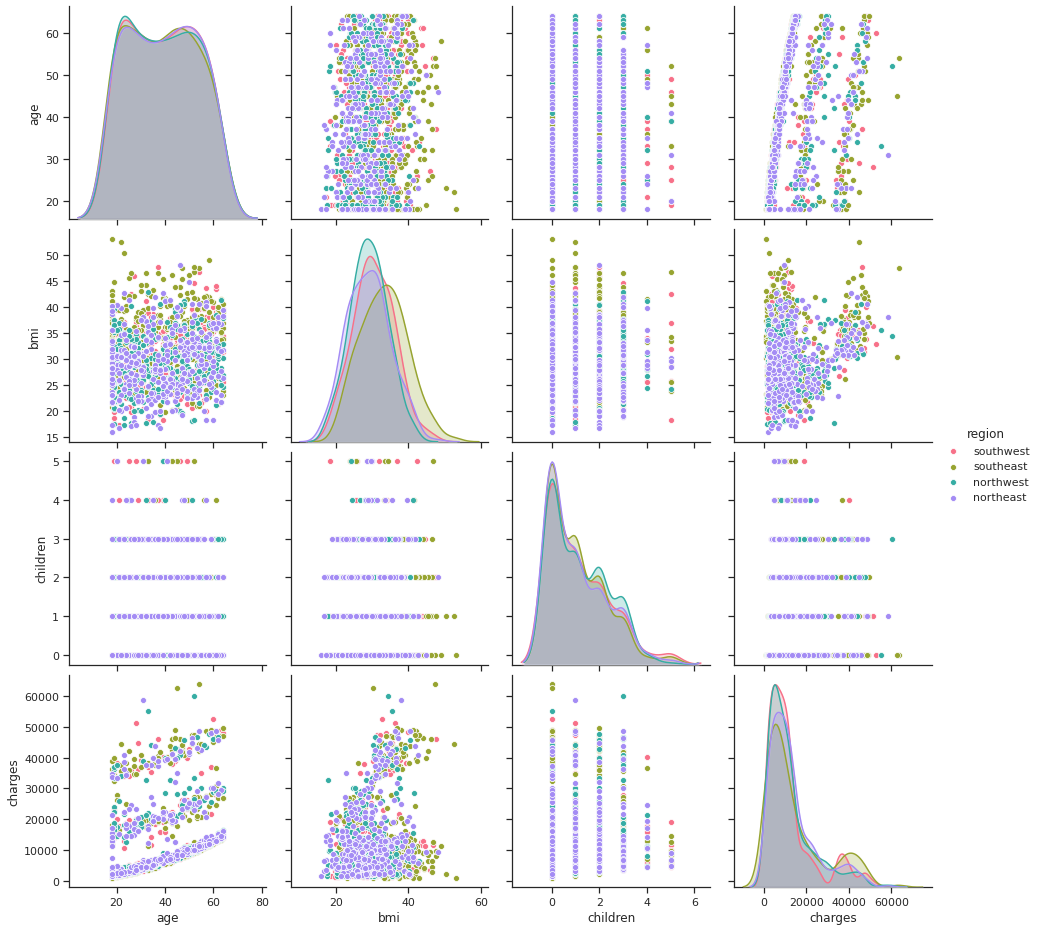

In [109]:
g = sb.pairplot(data, hue="region",palette="husl", height=3.2)
#'age','sex','bmi','children','smoker','region','charges'

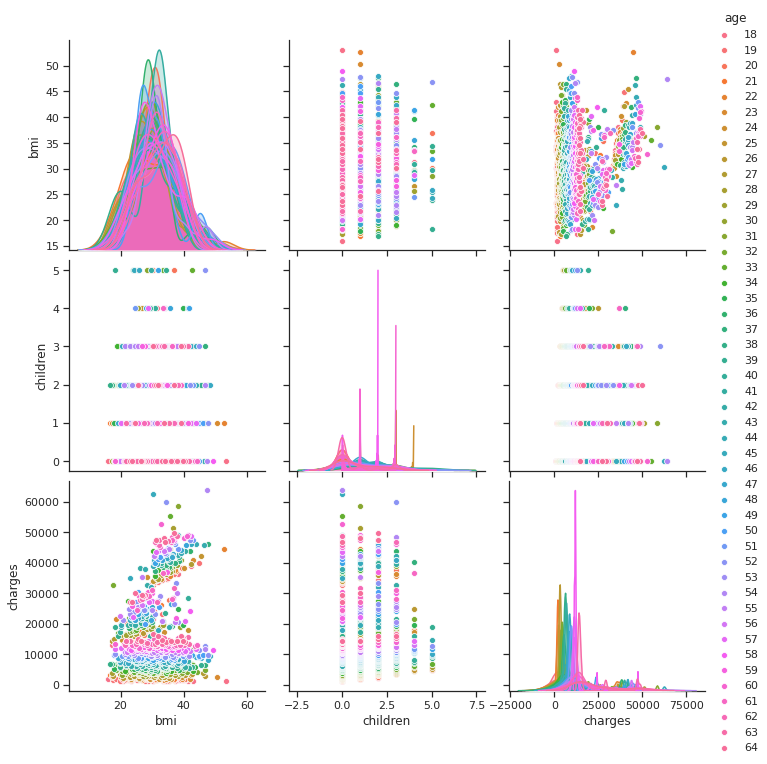

In [110]:
g = sb.pairplot(data, hue="age",palette="husl", height=3.2)
#'age','sex','bmi','children','smoker','region','charges'

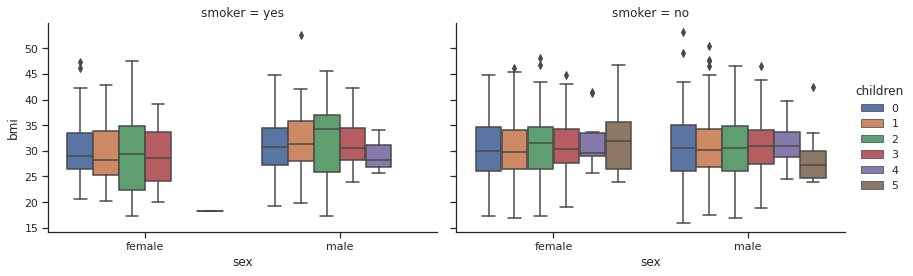

In [111]:
g = sb.catplot(x="sex", y="bmi", hue="children", col="smoker", data=data, kind="box", height=4, aspect=1.5)
#'age','sex','bmi','children','smoker','region','charges'

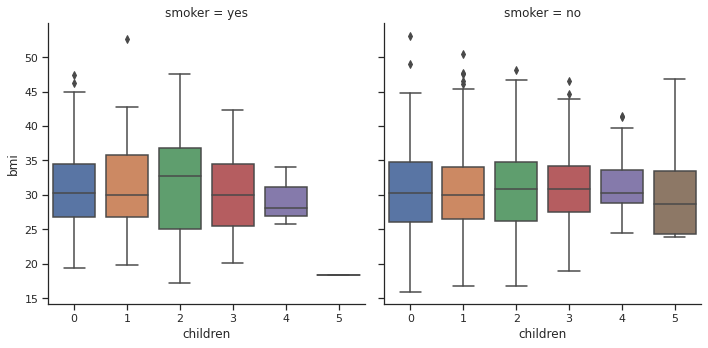

In [112]:
g = sb.catplot(x="children", y="bmi",  col="smoker", data=data, kind="box")

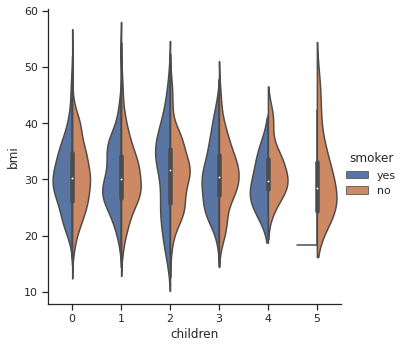

In [113]:
g=sb.catplot(x="children", y="bmi", hue="smoker", kind="violin", split=True, data=data)
#'age','sex','bmi','children','smoker','region','charges'

In [114]:
import scipy.stats

a=scipy.stats.pearsonr(data['age'], data['bmi'])    # Pearson's r
b=scipy.stats.spearmanr(data['age'], data['bmi'])   # Spearman's rho
c=scipy.stats.kendalltau(data['age'], data['bmi'])  # Kendall's tau
a,b,c  #'age','sex','bmi','children','smoker','region','charges'

((0.10927188154853519, 6.194289065051802e-05),
 SpearmanrResult(correlation=0.10773603532023862, pvalue=7.859093373677643e-05),
 KendalltauResult(correlation=0.07327326343408677, pvalue=7.277631522947318e-05))

In [115]:
#(data['age'].loc[data['age']<60]).plot.hist(bins=50)

In [116]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [118]:
#pd.get_dummies(data['sex']).head()
pd.get_dummies(data['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [119]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
dataset = pd.get_dummies(data)   # Use one hot encoding for convert the data catagorical to continuous
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


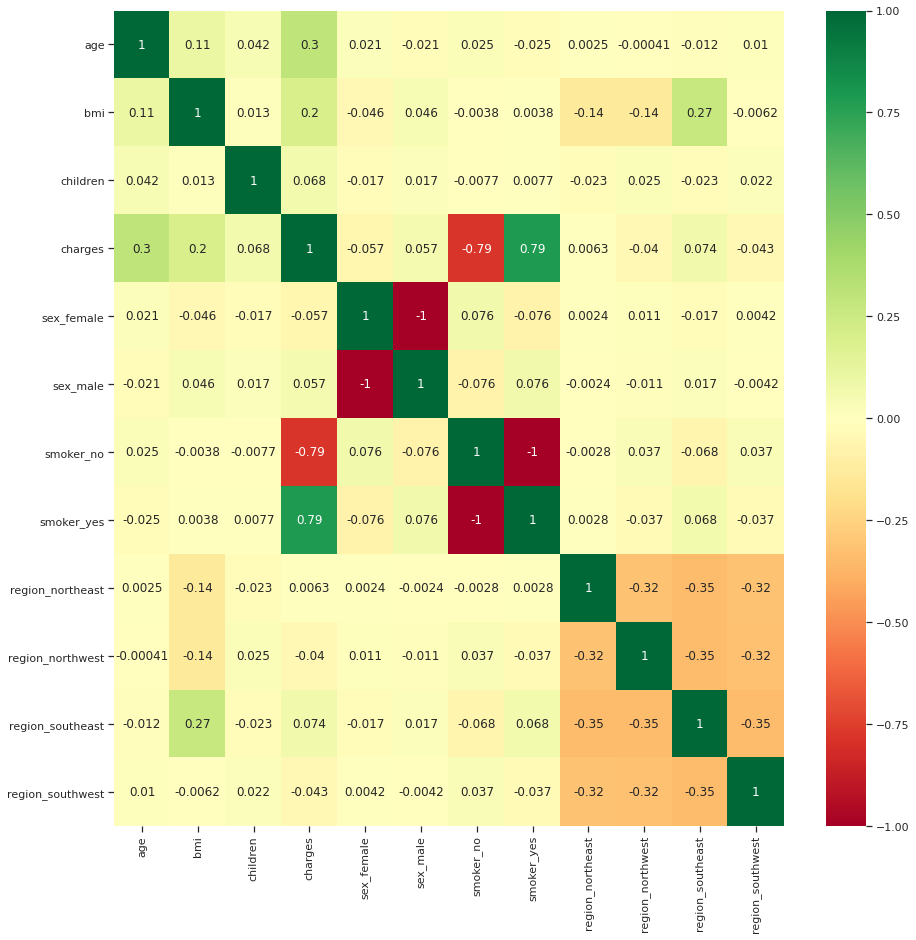

In [121]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sb.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [122]:
X = dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]   # Select (input data) for model
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [123]:
Y = dataset['charges']                         # Select (Target) for model
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [124]:

x=X.values                                      # Convert the data into a array
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [125]:

y=Y.values                                     # Convert the data into a array
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [126]:
x.shape, y.shape                                           # Show the dimention of the data

((1338, 11), (1338,))

In [127]:

### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [128]:
print(model.feature_importances_)

[0.12899589 0.19004143 0.02446988 0.00571626 0.00598368 0.58335645
 0.03723552 0.00649337 0.00648029 0.00655659 0.00467064]


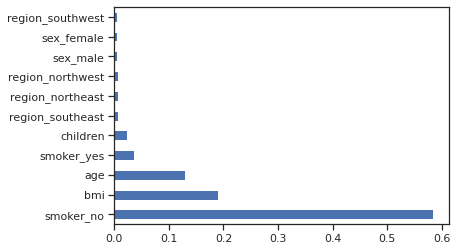

In [129]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split      # Split the data into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=.20,random_state =101) 

In [131]:
from sklearn.linear_model import LinearRegression          # Call linear regression library 
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
regression = LinearRegression(fit_intercept=True,normalize=False) # Set the parameters for 

In [133]:
Train = regression.fit(train_X,train_Y)

In [134]:
print('Intercept- :',regression.intercept_)

Intercept- : -1006.3437738449011


In [135]:
Test_Pred = Train.predict(test_X)

In [136]:
#Test_Pred

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(Test_Pred,test_Y)) # Find mean absolute error

Mean Absolute Error: 4036.874028358432


In [138]:
print('Mean Squared Error:',mean_squared_error(Test_Pred,test_Y))    # 

Mean Squared Error: 33748393.370595865


In [139]:
print('Root Of Mean Squared Error:',np.sqrt(mean_squared_error(Test_Pred,test_Y)))  # 

Root Of Mean Squared Error: 5809.336741022667


In [140]:
print("Training set score:{:.3f}".format(Train.score(train_X,train_Y)))
print("Testing set score:{:.3f}".format(Train.score(test_X,test_Y))) 

Training set score:0.748
Testing set score:0.761


Save the model

In [141]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

Testing The Model

In [143]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

'X_test = strat_test_set.drop("MEDV", axis=1)\nY_test = strat_test_set["MEDV"].copy()\nX_test_prepared = my_pipeline.transform(X_test)\nfinal_predictions = model.predict(X_test_prepared)\nfinal_mse = mean_squared_error(Y_test, final_predictions)\nfinal_rmse = np.sqrt(final_mse)\n# print(final_predictions, list(Y_test))'

In [ ]:
final_rmse

Using The Model

In [ ]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)